In [113]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,make_scorer
import matplotlib.pyplot as plt

In [108]:
import seaborn as sns
import numpy as np

In [57]:
data = pd.read_csv('Life_Expectancy_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Exercise 1: Data Pre-processing

1. Handling missing values

In [58]:

data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [59]:
df=pd.DataFrame(data)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [60]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Country', 'Status'], dtype='object')


In [61]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [62]:
df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace=True)


C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\3268138896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace=True)


In [63]:

df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)

C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\2676743617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)


In [64]:
df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)


C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\3337769602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)


In [65]:
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)


C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\560563027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)


In [66]:
df['Status'].fillna(df['Status'].mode(), inplace=True)


C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\3231017661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].fillna(df['Status'].mode(), inplace=True)


In [67]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [68]:
print(df[' BMI '])

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name:  BMI , Length: 2938, dtype: float64


In [69]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64

2. Encoding Categorical Variables:

In [70]:
catagory_col=df.select_dtypes(include=['object']).columns
encoder =  OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[catagory_col])
encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df_encoded = pd.concat([encoded, df.drop(columns=catagory_col)], axis=1) 


print(df_encoded)

      Country_Afghanistan  Country_Albania  Country_Algeria  Country_Angola  \
0                     1.0              0.0              0.0             0.0   
1                     1.0              0.0              0.0             0.0   
2                     1.0              0.0              0.0             0.0   
3                     1.0              0.0              0.0             0.0   
4                     1.0              0.0              0.0             0.0   
...                   ...              ...              ...             ...   
2933                  0.0              0.0              0.0             0.0   
2934                  0.0              0.0              0.0             0.0   
2935                  0.0              0.0              0.0             0.0   
2936                  0.0              0.0              0.0             0.0   
2937                  0.0              0.0              0.0             0.0   

      Country_Antigua and Barbuda  Country_Argentin

In [71]:
df_encoded.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
df_encoded.to_csv('encoded_data.csv',index=False)

# Exercise 2: Exploratory Data Analysis (EDA)

In [73]:
''' 
1. Correlation Analysis:
o Ask students to compute a correlation matrix to identify the linear relationships
between &quot;Life expectancy&quot; and the other numerical variables.

2. Visualization:
o Have students create scatter plots of &quot;Life expectancy&quot; versus other continuous features
such as &quot;Alcohol,&quot; &quot;GDP,&quot; and &quot;BMI&quot; to identify potential predictors.
'''

' \n1. Correlation Analysis:\no Ask students to compute a correlation matrix to identify the linear relationships\nbetween &quot;Life expectancy&quot; and the other numerical variables.\n\n2. Visualization:\no Have students create scatter plots of &quot;Life expectancy&quot; versus other continuous features\nsuch as &quot;Alcohol,&quot; &quot;GDP,&quot; and &quot;BMI&quot; to identify potential predictors.\n'

In [74]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

1. Correlation Analysis:

In [123]:
# numeric_col=df.select_dtypes(include=['float64','int64']).columns
num_col=df.select_dtypes(include=['float64','int64']).columns

cor_mat=df[numeric_col].corr()

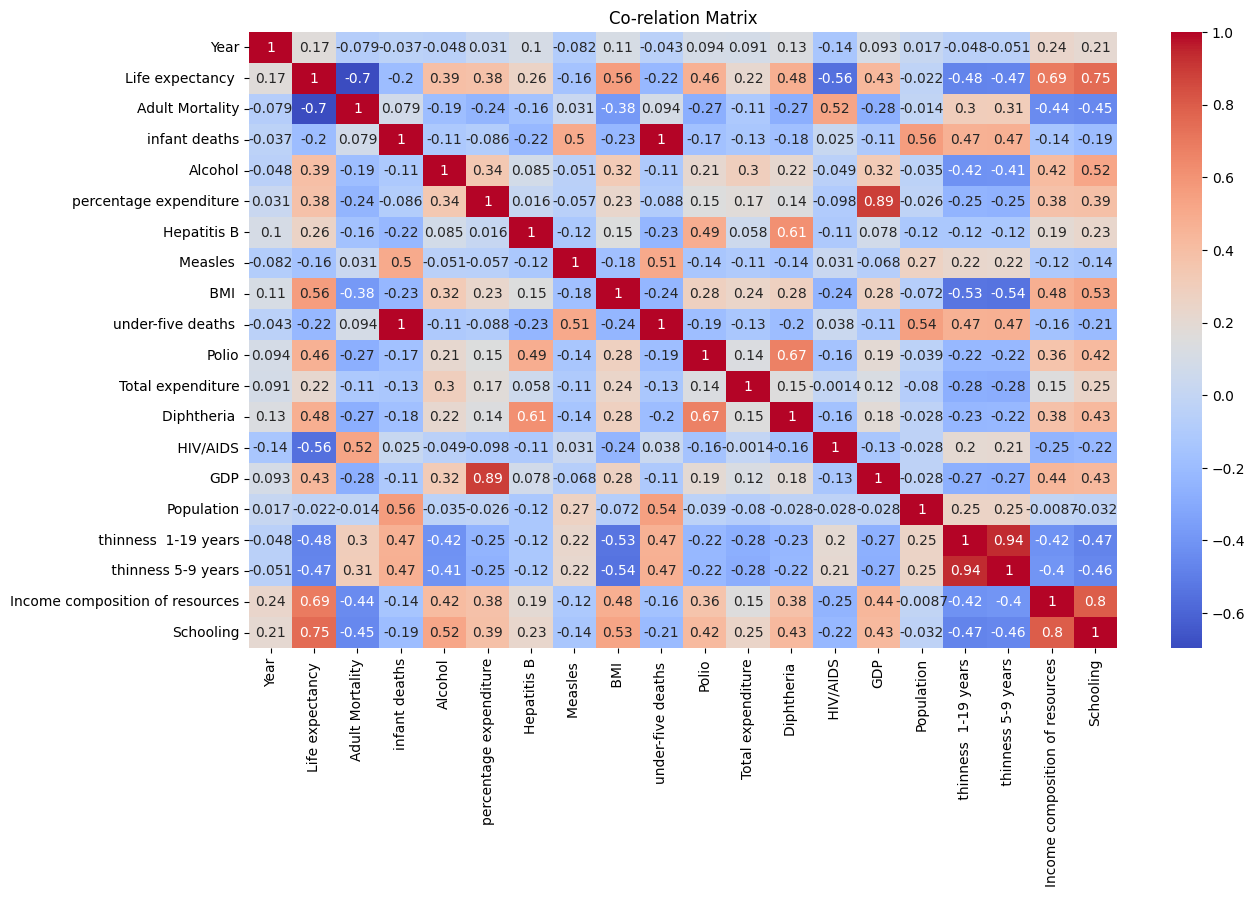

In [124]:
# sel_cols = df[['Life expectancy ','Adult Mortality','Population']]
# cat_col= df.select_dtypes(include=['number']).columns
num_col=df.select_dtypes(include=['float64','int64']).columns

# df=pd.DataFrame(numerical_columns)

cor_mat=df[numeric_col].corr()

# print(correlation_matrix)
plt.figure(figsize=(14, 8))

sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title('Co-relation Matrix')
plt.show()

2. Visualization:

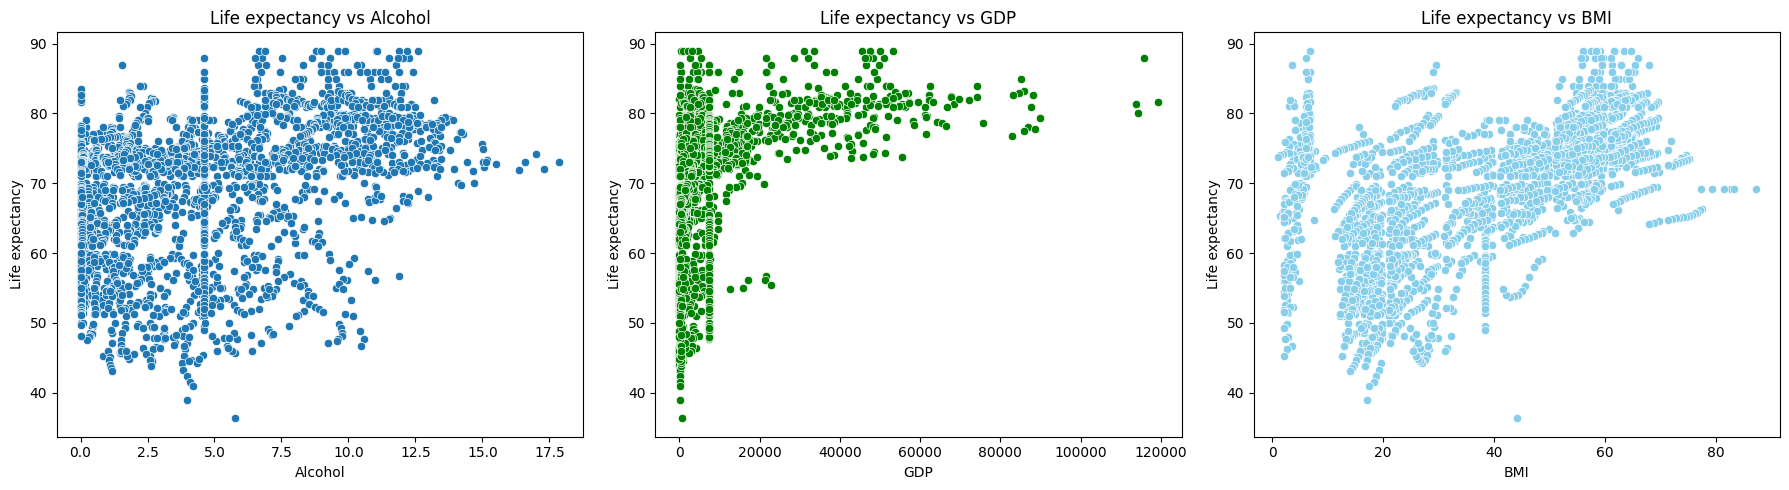

In [125]:
plt.figure(figsize=(18, 5))

# Scatter plot: Life expectancy vs Alcohol
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['Alcohol'], y=df['Life expectancy '])
plt.title('Life expectancy vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

# Scatter plot: Life expectancy vs GDP
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['GDP'], y=df['Life expectancy '],color='green')
plt.title('Life expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

# Scatter plot: Life expectancy vs BMI
plt.subplot(1, 3, 3)
sns.scatterplot(x=df[' BMI '], y=df['Life expectancy '],color='skyblue')
plt.title('Life expectancy vs BMI')
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [78]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Exercise 3: Multiple Linear Regression (MLR)

1. Target: Life Expectancy:

In [79]:
df.shape

(2938, 22)

In [80]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64

In [81]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)


C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\2466330426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_5992\2466330426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [82]:
X = df[['Adult Mortality', 'Alcohol', 'GDP']]
y = df['Life expectancy ']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)





Visualization of Model

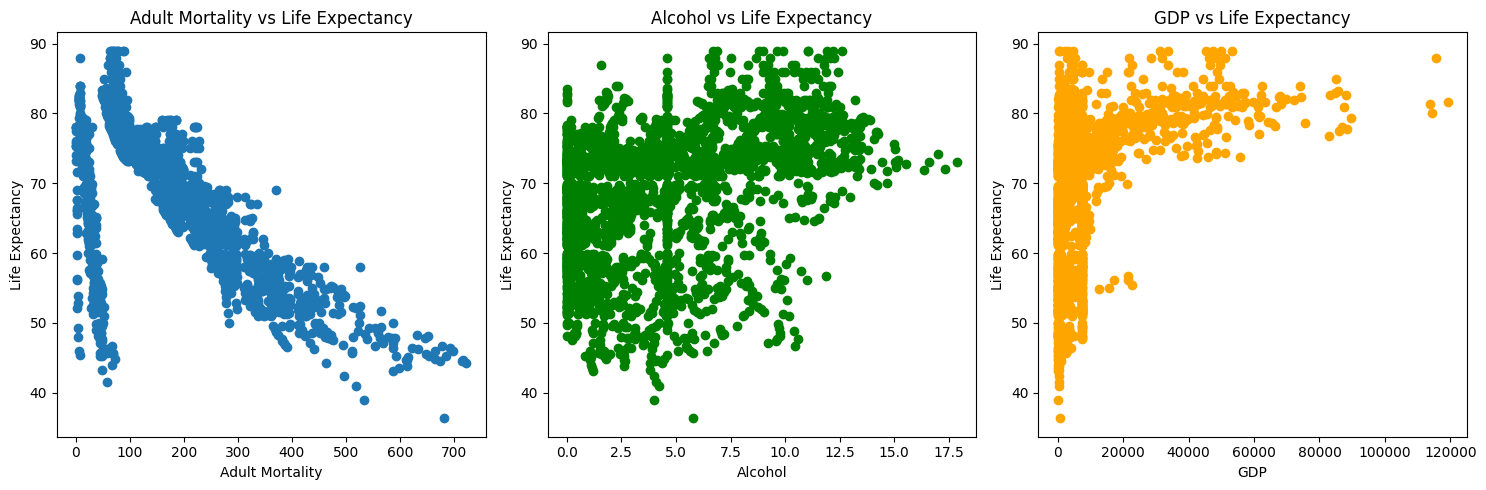

In [83]:
plt.figure(figsize=(15,5))


plt.subplot(1, 3, 1)
plt.scatter(df['Adult Mortality'], df['Life expectancy '])

plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.title('Adult Mortality vs Life Expectancy')


plt.subplot(1, 3, 2)
plt.scatter(df['Alcohol'], df['Life expectancy '],color='green')
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')
plt.title('Alcohol vs Life Expectancy')


plt.subplot(1, 3, 3)
plt.scatter(df['GDP'], df['Life expectancy '],color='orange')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('GDP vs Life Expectancy')


plt.tight_layout()
plt.show()

2. Model Building:(MSE)

In [84]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 37.177789955251356


3. Model Interpretation:

In [85]:
slope1 = model.coef_[0]
intercept1 = model.intercept_
print(f"Intercept A (b): {intercept1}")
print(f"Slope A (m): {slope1}")
slope2 = model.coef_[1]
intercept2 = model.intercept_
print(f"Intercept B (b): {intercept2}")
print(f"Slope B (m): {slope2}")
slope3 = model.coef_[2]
intercept3 = model.intercept_
print(f"Intercept C (b): {intercept3}")
print(f"Slope C (m): {slope3}")

Intercept A (b): 73.60018290276818
Slope A (m): -0.046722095732496624
Intercept B (b): 73.60018290276818
Slope B (m): 0.5250268278052215
Intercept C (b): 73.60018290276818
Slope C (m): 0.0001368211311556511


In [86]:
slope3 = model.coef_
intercept = model.intercept_
print(f"Intercept  (b): {intercept}")
print(f"Slope  (m): {slope3}")

Intercept  (b): 73.60018290276818
Slope  (m): [-4.67220957e-02  5.25026828e-01  1.36821131e-04]


Second method of visualization

In [87]:
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Adult Mortality'], df['Life expectancy '], color='orange', label='Adult Mortality')
# plt.scatter(df['Alcohol'], df['Life expectancy '], color='blue', label='Alcohol')

# plt.scatter(df['GDP'], df['Life expectancy '], color='green', label='GDP')


# plt.xlabel('Features')
# plt.ylabel('Life Expectancy')
# plt.title('Life Expectancy vs Various Features')


# plt.legend()


# plt.show()



In [88]:
df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Instruct students to interpret the coefficients to understand the impact of each
independent variable on Life expectancy

4. Residuals Analysis

In [89]:
# Homoscedasticity is a key assumption in linear regression 
# analysis that states that the error term is the same across all values of the independent variables

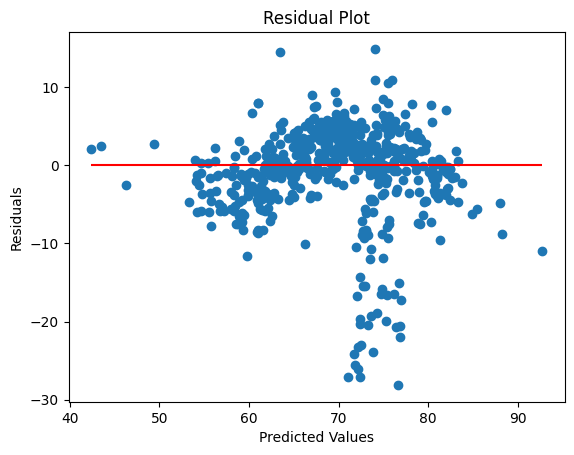

In [90]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Exercise 4: Multivariate Linear Regression (MVLR)

1. Target: Life Expectancy and Adult Mortality:

Apply multivariate linear regression model with "Life expectancy" and "Adult Mortality" as dependent variables. The independent variables can be "Alcohol," "GDP," "BMI," and "Income composition of resources."

In [91]:
X= df[['Alcohol', 'GDP', ' BMI ', 'Income composition of resources']]
Y = df[['Life expectancy ', 'Adult Mortality']]




In [92]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the Multivariate Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)



2. Model Interpretation:

In [94]:
# Output the coefficients and intercepts
print("Coefficients: ", model.coef_)
print("Intercepts: ", model.intercept_)
print('Overall Co-efficent')
print("Coefficients: ", model.coef_[0])
print("Intercepts: ", model.intercept_[0])
print('First Co-efficent')

print("Coefficients: ", model.coef_[1])
print("Intercepts: ", model.intercept_[1])
print('Second Co-efficent')

# print("Coefficients: ", model.coef_[2])
# print("Intercepts: ", model.intercept_[2])
# print('Third Co-efficent')



Coefficients:  [[ 1.37585371e-01  8.47308754e-05  1.27220290e-01  2.31610280e+01]
 [ 1.34927974e+00 -8.29654760e-04 -1.33540610e+00 -2.00312229e+02]]
Intercepts:  [ 48.60780274 341.60171387]
Overall Co-efficent
Coefficients:  [1.37585371e-01 8.47308754e-05 1.27220290e-01 2.31610280e+01]
Intercepts:  48.60780273915001
First Co-efficent
Coefficients:  [ 1.34927974e+00 -8.29654760e-04 -1.33540610e+00 -2.00312229e+02]
Intercepts:  341.6017138725902
Second Co-efficent


In [128]:

# # Split data into training and testing sets


# # Plotting the actual vs predicted values for both dependent variables

# # Scatter plot for Dependent Variable 1 (Y1)
# plt.subplot(1, 2, 1)
# plt.scatter(Y_test[:, 0], Y_pred[:, 0], color='blue')
# plt.plot([min(Y_test[:, 0]), max(Y_test[:, 0])], [min(Y_test[:, 0]), max(Y_test[:, 0])], color='red')
# plt.xlabel('Actual Y1')
# plt.ylabel('Predicted Y1')
# plt.title('Actual vs Predicted for Y1')

# # Scatter plot for Dependent Variable 2 (Y2)
# plt.subplot(1, 2, 2)
# plt.scatter(Y_test[:, 1], Y_pred[:, 1], color='green')
# plt.plot([min(Y_test[:, 1]), max(Y_test[:, 1])], [min(Y_test[:, 1]), max(Y_test[:, 1])], color='red')
# plt.xlabel('Actual Y2')
# plt.ylabel('Predicted Y2')
# plt.title('Actual vs Predicted for Y2')

# plt.tight_layout()
# plt.show()


Visualization

In [131]:
# Assuming the model has been trained and predictions made as per previous code

# Combine the actual and predicted values into a DataFrame for easy plotting
results = pd.DataFrame({
    'Actual Life Expectancy': Y_test['Life expectancy '],
    'Predicted Life Expectancy': Y_pred[:, 0],
    'Actual Adult Mortality': Y_test['Adult Mortality'],
    'Predicted Adult Mortality': Y_pred[:, 1],
})

Text(0, 0.5, 'Predicted Life Expectancy')

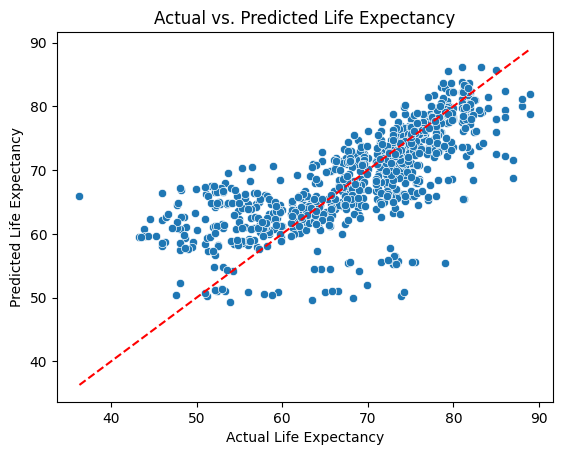

In [132]:

# Plot for Life Expectancy
sns.scatterplot(x='Actual Life Expectancy', y='Predicted Life Expectancy', data=results)
sns.lineplot(x=[results['Actual Life Expectancy'].min(), results['Actual Life Expectancy'].max()],
             y=[results['Actual Life Expectancy'].min(), results['Actual Life Expectancy'].max()],
             color='red', linestyle='--')
plt.title('Actual vs. Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')


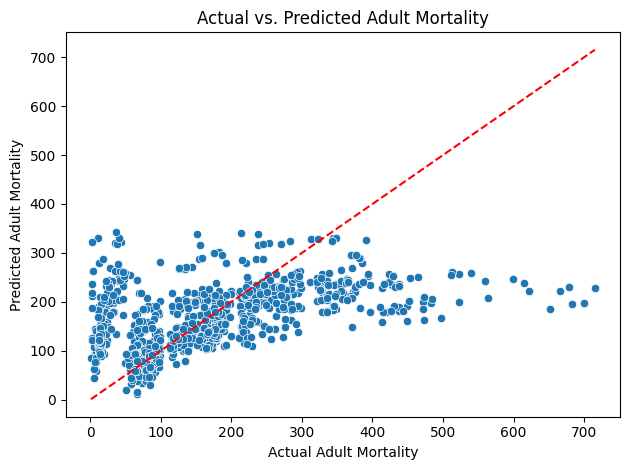

In [129]:
# Plot for Adult Mortality

sns.scatterplot(x='Actual Adult Mortality', y='Predicted Adult Mortality', data=results)
sns.lineplot(x=[results['Actual Adult Mortality'].min(), results['Actual Adult Mortality'].max()],
             y=[results['Actual Adult Mortality'].min(), results['Actual Adult Mortality'].max()],
             color='red', linestyle='--')
plt.title('Actual vs. Predicted Adult Mortality')
plt.xlabel('Actual Adult Mortality')
plt.ylabel('Predicted Adult Mortality')

plt.tight_layout()
plt.show()

3. Comparative Analysis:

In [103]:
X= df[['Alcohol', 'GDP', ' BMI ', 'Income composition of resources']]

y = df['Life expectancy ']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 37.60704674780063


In [102]:
X= df[['Alcohol', 'GDP', ' BMI ', 'Income composition of resources']]

y = df['Adult Mortality']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 11229.103821552291


In [98]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# 5. Cross-Validation

In [122]:
X= df[['Alcohol', 'GDP', ' BMI ', 'Income composition of resources']]

y = df['Life expectancy ']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv = make_scorer(mean_squared_error, greater_is_better=False)

cv = cross_val_score(model, X, y, cv=kf, scoring=cv)
cv = -cv

# executes one by one
# for i, mse in enumerate(cv, 1):
#     print(f'MSE for fold {i}: {cv}')
print(cv)
# printing over all
mean_mse = np.mean(cv)
print(f'Average MSE across all folds: {mean_mse}')



[37.60704675 42.61439006 39.86986555 39.09797008 38.94172086]
Average MSE across all folds: 39.626198660125596
